<a href="https://colab.research.google.com/github/Tashii-nayak/ADNI_MRI/blob/main/ADNI_MRI_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()  # A dialog will pop up to select your file
import os
print(os.listdir('/content'))

Saving AD_T2.zip to AD_T2.zip
['.config', 'AD_T2.zip', 'sample_data']


In [2]:
from zipfile import ZipFile
import os

# Extract the ZIP file
zip_path = "/content/AD_T2.zip"  # Adjust if filename differs
extract_dir = "/content/AD_T2_data"

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Files extracted.")

Files extracted.


In [3]:
import os

root ="/content/AD_T2_data"
for dirpath, dirnames, filenames in os.walk(root):
    print(f"{dirpath} → {len(filenames)} files")

/content/AD_T2_data → 0 files
/content/AD_T2_data/ADNI → 0 files
/content/AD_T2_data/ADNI/002_S_1155 → 0 files
/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR → 0 files
/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0 → 0 files
/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270013 → 44 files
/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270008 → 44 files
/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270003 → 44 files
/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270014 → 44 files
/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270007 → 44 files
/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270002 → 44 files
/content/AD_T2_data/ADNI/002_S_1155/Field_Mapping → 0 files
/content/AD_T2_data/ADNI/002_S_1155/Field_Mapping/2019-05-16_11_36_14.0 → 0 files
/content/AD_T2_data/A

In [4]:
#Installs pydicom to read .dcm files and Pillow to convert arrays to images.
!pip install pydicom
!pip install pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 51.1 MB/s eta 0:00:00


In [5]:
import os #os provides a way to interact with the file system.
import pydicom #pydicom is a Python library specifically for reading and working with DICOM medical images
import numpy as np #MRI images are numerical arrays. NumPy is used for numerical operations on these image arrays.
from PIL import Image #This converts and saves your DICOM as a proper .png file.

source_root = "/content/AD_T2_data"
output_root = "/content/AD_T2_PNG/Unsorted" #folder where PNGs will be saved.
os.makedirs(output_root, exist_ok=True) # creates the folder if it doesn’t exist.

count = 0
#Reads each DICOM file.
for dirpath, _, filenames in os.walk(source_root): #This helps automate access to many nested DICOM files.
    for fname in filenames:
        if fname.endswith(".dcm"): # checks extension
            try:
                fpath = os.path.join(dirpath, fname) #This builds the full file path by joining the current directory path (dirpath) and the filename (fname).
                dicom = pydicom.dcmread(fpath) #This line reads the DICOM file located at fpath using the pydicom library.
                img_array = dicom.pixel_array #Extracts the actual pixel data

                # Normalize to 0-255 and convert to uint8 (This turns raw DICOM images into standard grayscale images for ML use.)
                img = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array)) * 255.0
                img = img.astype(np.uint8)

                img_pil = Image.fromarray(img)
                img_pil = img_pil.convert("L")  # grayscale, "L" stands for luminance, image will have 1 channel, with pixel values from 0 (black) to 255 (white)

                # Save
                out_path = os.path.join(output_root, f"{count:06d}.png")
                img_pil.save(out_path)
                count += 1
            except Exception as e:
                print(f"Error reading {fpath}: {e}")

In [6]:
for root, dirs, files in os.walk(extract_dir):
    print(f"{root} → {len(files)} files")

/content/AD_T2_data → 0 files
/content/AD_T2_data/ADNI → 0 files
/content/AD_T2_data/ADNI/002_S_1155 → 0 files
/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR → 0 files
/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0 → 0 files
/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270013 → 44 files
/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270008 → 44 files
/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270003 → 44 files
/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270014 → 44 files
/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270007 → 44 files
/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270002 → 44 files
/content/AD_T2_data/ADNI/002_S_1155/Field_Mapping → 0 files
/content/AD_T2_data/ADNI/002_S_1155/Field_Mapping/2019-05-16_11_36_14.0 → 0 files
/content/AD_T2_data/A

In [7]:
import os

dicom_paths = []
for root, dirs, files in os.walk("/content/AD_T2_data"):
    for file in files:
        full_path = os.path.join(root, file)
        dicom_paths.append(full_path)

print(f"Total files found: {len(dicom_paths)}")
print("Sample paths:", dicom_paths[:5])

Total files found: 4820
Sample paths: ['/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270013/ADNI_002_S_1155_MR_Axial_3TE_T2_STAR__br_raw_20191223104346982_42_S907766_I1270013.dcm', '/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270013/ADNI_002_S_1155_MR_Axial_3TE_T2_STAR__br_raw_20191223104351600_5_S907766_I1270013.dcm', '/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270013/ADNI_002_S_1155_MR_Axial_3TE_T2_STAR__br_raw_20191223104358640_22_S907766_I1270013.dcm', '/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270013/ADNI_002_S_1155_MR_Axial_3TE_T2_STAR__br_raw_20191223104345763_19_S907766_I1270013.dcm', '/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270013/ADNI_002_S_1155_MR_Axial_3TE_T2_STAR__br_raw_20191223104349771_17_S907766_I1270013.dcm']


In [8]:
import pydicom

valid_dicom_paths = []

for path in dicom_paths:
    try:
        ds = pydicom.dcmread(path, stop_before_pixels=True)
        valid_dicom_paths.append(path)
    except Exception as e:
        pass  # not a valid DICOM

print(f"Total valid DICOM files: {len(valid_dicom_paths)}")
print("Sample DICOM files:", valid_dicom_paths[:3])

Total valid DICOM files: 4820
Sample DICOM files: ['/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270013/ADNI_002_S_1155_MR_Axial_3TE_T2_STAR__br_raw_20191223104346982_42_S907766_I1270013.dcm', '/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270013/ADNI_002_S_1155_MR_Axial_3TE_T2_STAR__br_raw_20191223104351600_5_S907766_I1270013.dcm', '/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270013/ADNI_002_S_1155_MR_Axial_3TE_T2_STAR__br_raw_20191223104358640_22_S907766_I1270013.dcm']


In [9]:
import os
import pydicom
import cv2
import numpy as np

# This function organizes converted DICOMs into class-wise folders for training.
def convert_dicom_to_jpg(dicom_dir, save_dir, class_label):
    output_path = os.path.join(save_dir, class_label)
    os.makedirs(output_path, exist_ok=True)

    count = 0
    for root, _, files in os.walk(dicom_dir):
        for file in files:
            if file.endswith(".dcm"):
                try:
                    dcm = pydicom.dcmread(os.path.join(root, file))
                    img = dcm.pixel_array
                    img = cv2.resize(img, (224, 224))
                    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
                    img = img.astype(np.uint8)
                    save_file = os.path.join(output_path, f"{class_label}_{count}.jpg")
                    cv2.imwrite(save_file, img)
                    count += 1
                except Exception as e:
                    print(f"Skipping {file}: {e}")

# Use one valid path from your list
convert_dicom_to_jpg(
    dicom_dir="/content/AD_T2_data/ADNI/002_S_0413/Axial_T2_STAR/2017-06-21_13_23_38.0/I863057",
    save_dir="/content/processed_ADNI",
    class_label="AD"
)

In [10]:
import os

target_path = "/content/ADNI_data/ADNI/003_S_1234/Axial_T2/2018-05-10_10_22_11.0/I999999"
if os.path.exists(target_path):
    print("Folder exists.")
    files = os.listdir(target_path)
    print(f"Found {len(files)} files.")
    dcm_files = [f for f in files if f.endswith(".dcm")]
    print(f"Found {len(dcm_files)} DICOM files.")
else:
    print("Path does not exist.")


Path does not exist.


In [11]:
import os
print("Contents of /content:", os.listdir("/content"))

Contents of /content: ['.config', 'AD_T2.zip', 'AD_T2_data', 'processed_ADNI', 'AD_T2_PNG', 'sample_data']


In [12]:
import os

found = False
for root, dirs, files in os.walk("/content/AD_T2_data"):
    dcm_count = len([f for f in files if f.endswith(".dcm")])
    if dcm_count > 0:
        print(f"{root} → {dcm_count} DICOM files")
        found = True

if not found:
    print("No DICOM (.dcm) files found under /content/AD_T2_data.")

/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270013 → 44 DICOM files
/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270008 → 44 DICOM files
/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270003 → 44 DICOM files
/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270014 → 44 DICOM files
/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270007 → 44 DICOM files
/content/AD_T2_data/ADNI/002_S_1155/Axial_3TE_T2_STAR/2019-05-16_11_36_14.0/I1270002 → 44 DICOM files
/content/AD_T2_data/ADNI/002_S_1155/Field_Mapping/2019-05-16_11_36_14.0/I1270016 → 54 DICOM files
/content/AD_T2_data/ADNI/002_S_1155/Field_Mapping/2019-05-16_11_36_14.0/I1270015 → 54 DICOM files
/content/AD_T2_data/ADNI/002_S_1155/Field_Mapping/2018-05-08_13_06_40.0/I995515 → 54 DICOM files
/content/AD_T2_data/ADNI/002_S_1155/Field_Mapping/2018-05-08_13_06_40.0/I995514 → 54 DICOM file

In [13]:
for root, dirs, files in os.walk("/content/ADNI_data"):
    dcm_count = len([f for f in files if f.endswith(".dcm")])
    if dcm_count > 0:
        print(f"{root} → {dcm_count} DICOM files")

In [14]:
import os

for root, dirs, files in os.walk("/content/processed_ADNI"):
    print(f"{root} → {len(files)} files")

/content/processed_ADNI → 0 files
/content/processed_ADNI/AD → 44 files


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) #Normalizes image pixels to [0, 1].Splits data: 80% training, 20% validation.

train_gen = datagen.flow_from_directory(
    "/content/processed_ADNI",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
#Auto-labels each folder.Outputs images in batches of 32.
val_gen = datagen.flow_from_directory(
    "/content/processed_ADNI",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 36 images belonging to 1 classes.
Found 8 images belonging to 1 classes.


In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
#A deeper network that:Extracts spatial features,Applies regularization (dropout),Reduces overfitting,Outputs class probabilities using softmax.
#activation for learning complex patterns
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen.num_classes, activation='softmax')
])
#categorical_crossentropy is a loss function used in multi-class classification problems, where each sample belongs to one and only one class out of N possible classes.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#Trains the model for 10 epochs.(epoch is one complete pass through the entire training dataset)
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.f

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 696ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 699ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 840ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 706ms/step - accuracy: 1.0000 - loss: 0.0000e+

In [18]:
import matplotlib.pyplot as plt
import glob
from PIL import Image
import os

def show_images_from_folder(folder_path, n=9):
    image_paths = glob.glob(os.path.join(folder_path, "*.jpg"))[:n]

    plt.figure(figsize=(12, 8))
    for i, path in enumerate(image_paths):
        img = Image.open(path)
        plt.subplot(3, 3, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(os.path.basename(path))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

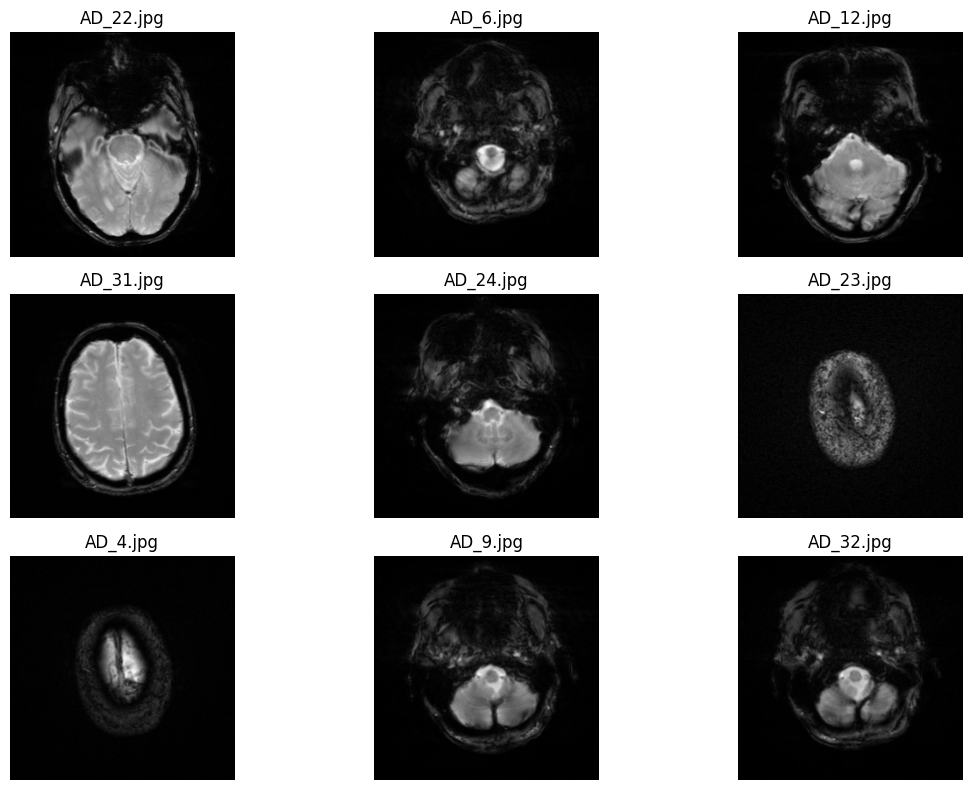

In [19]:
show_images_from_folder("/content/processed_ADNI/AD")

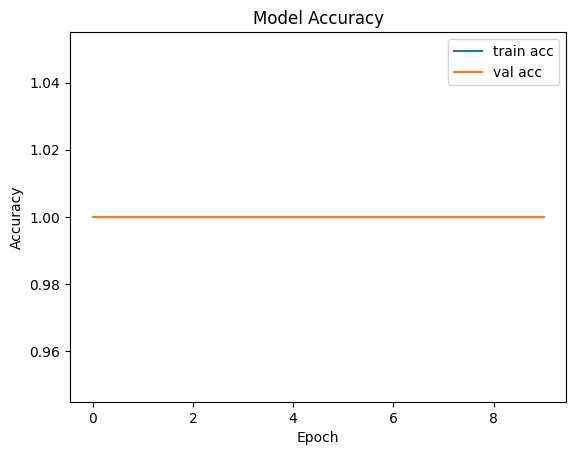

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


Showing 36 images from Training Set:


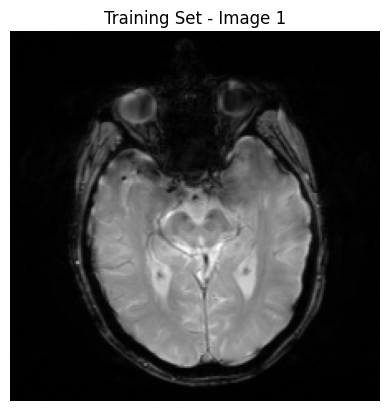

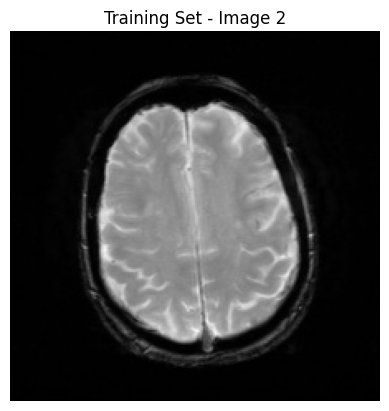

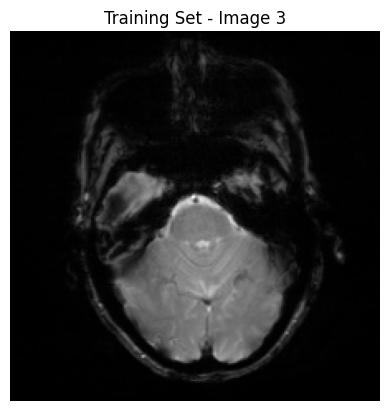

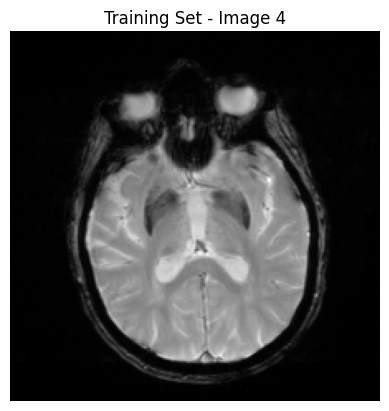

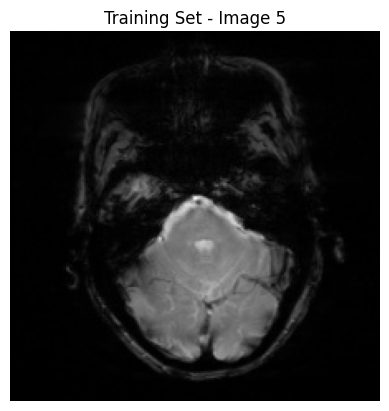

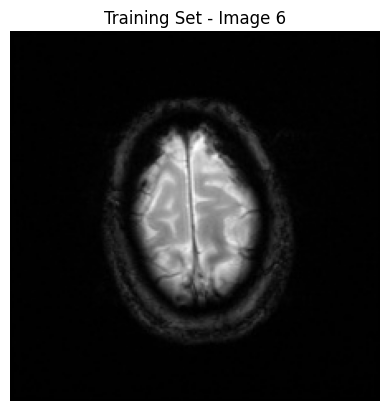

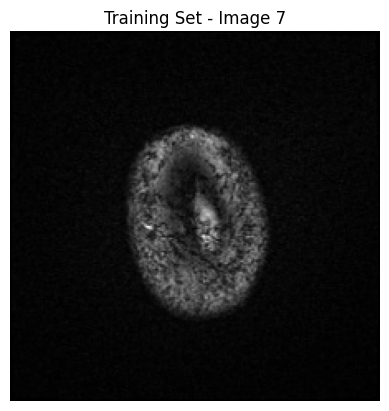

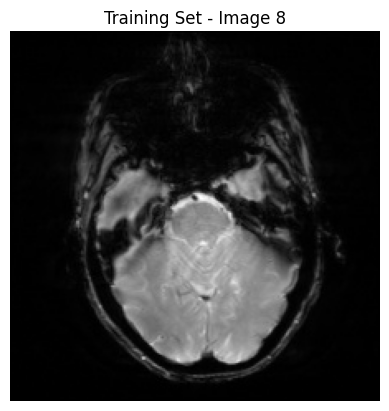

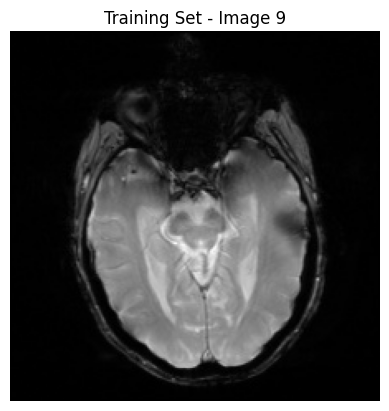

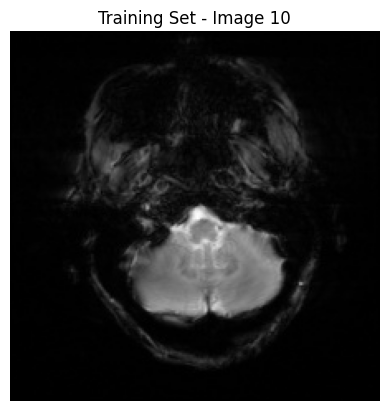

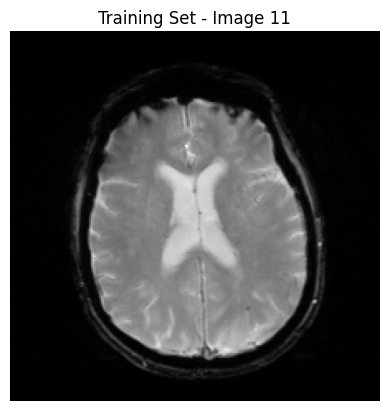

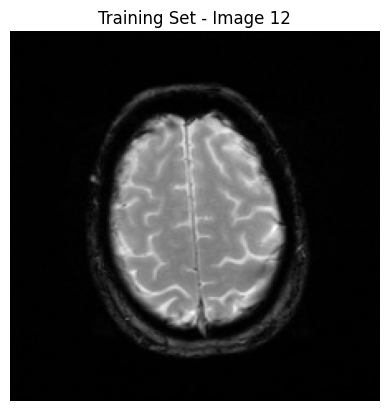

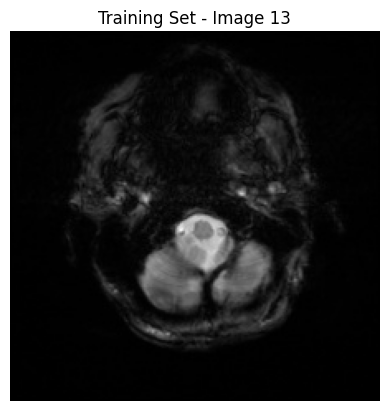

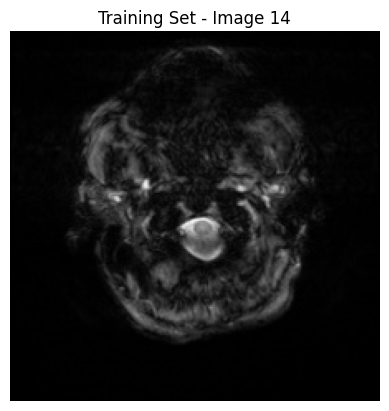

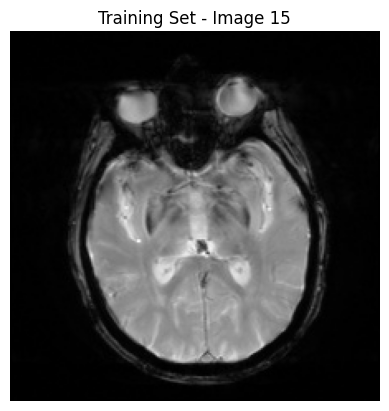

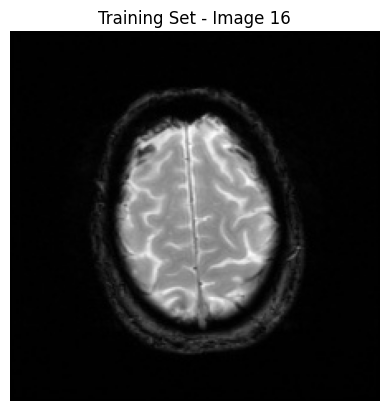

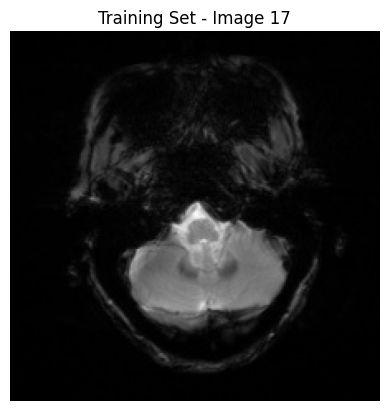

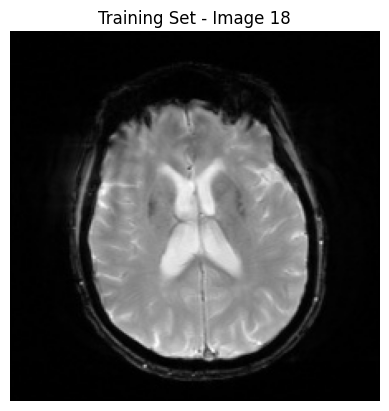

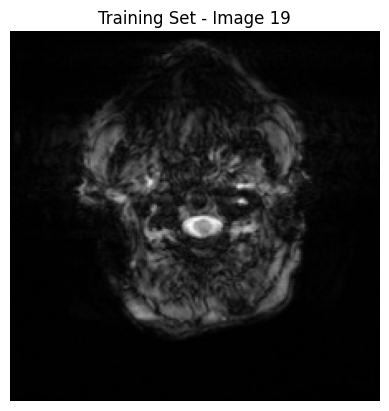

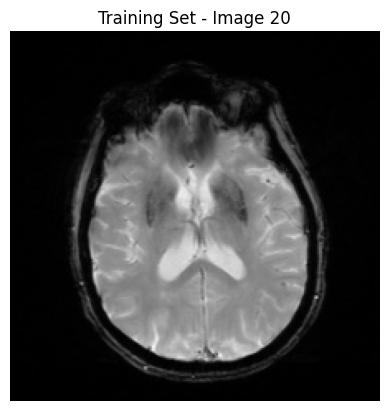

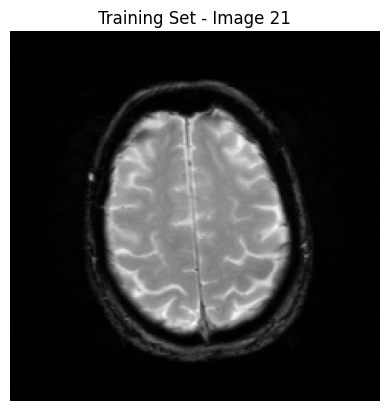

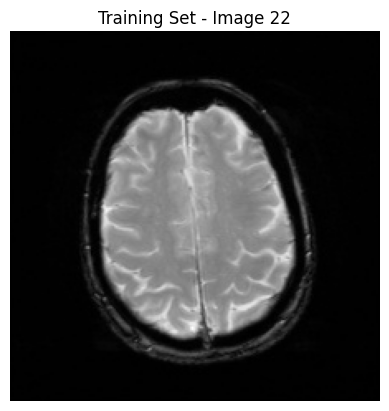

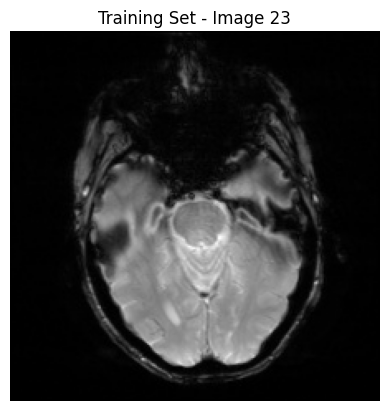

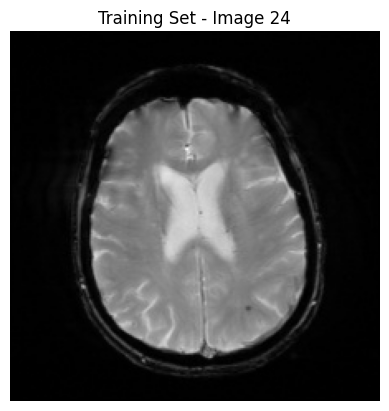

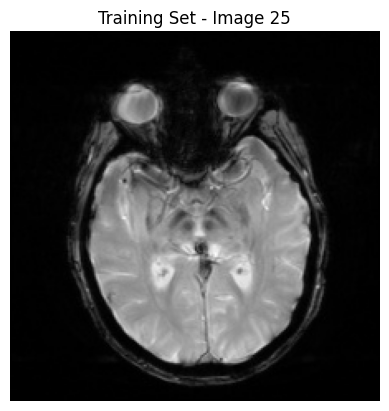

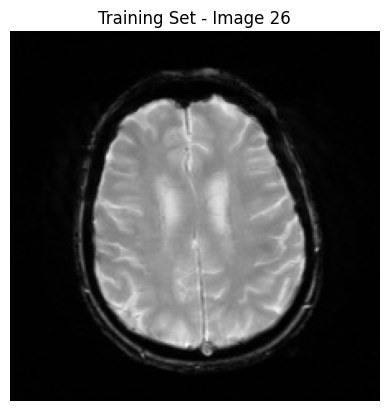

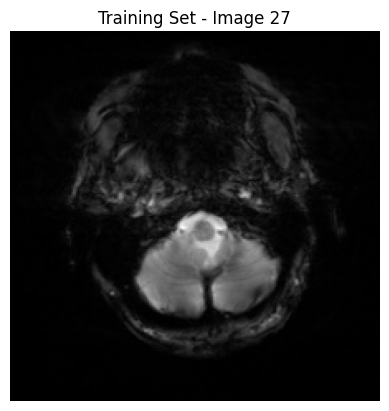

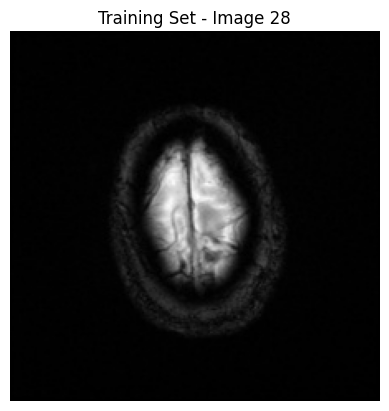

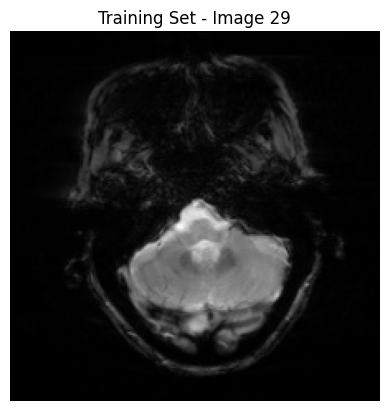

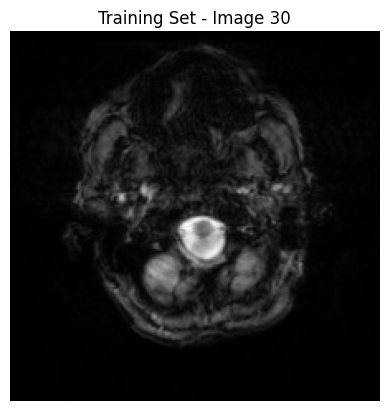

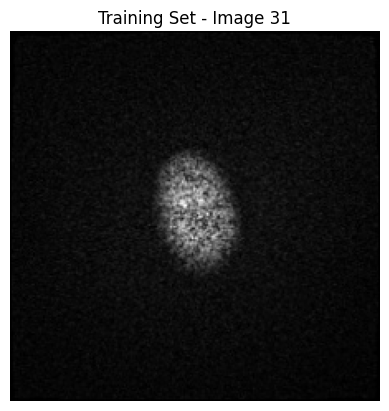

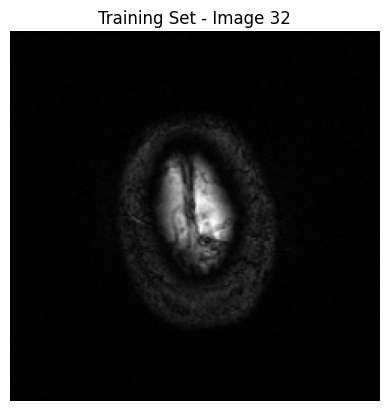

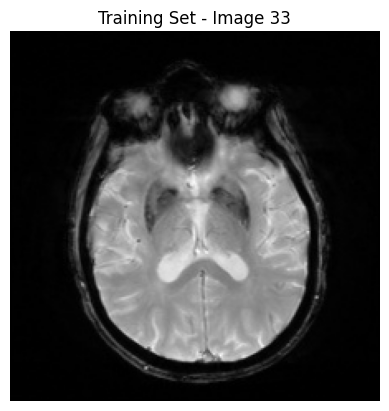

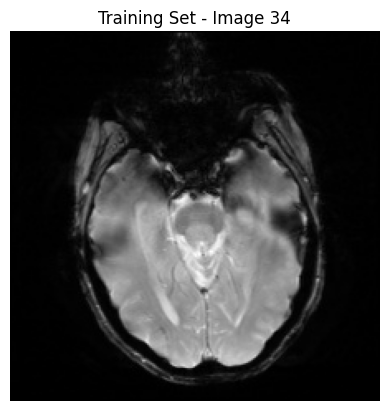

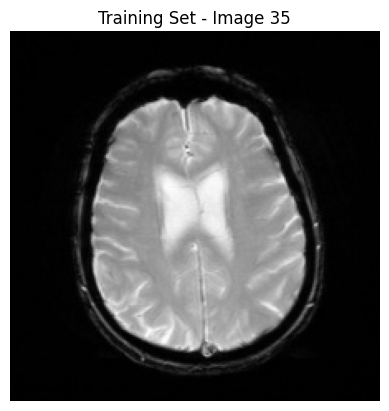

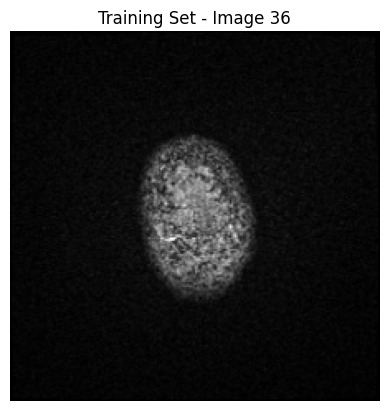


Showing 8 images from Validation Set:


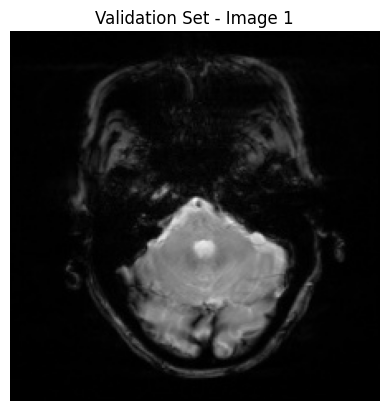

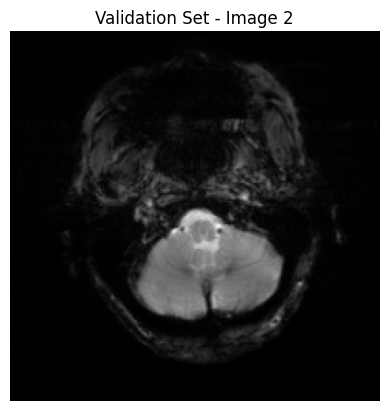

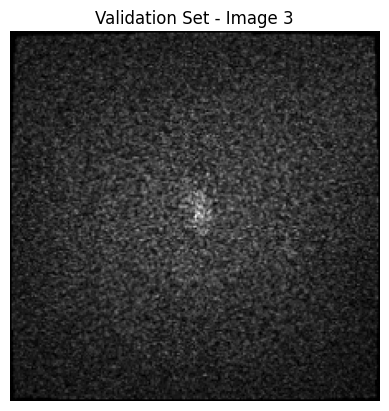

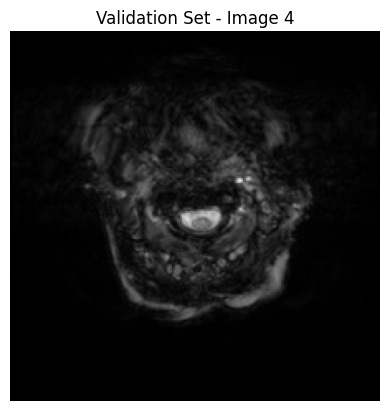

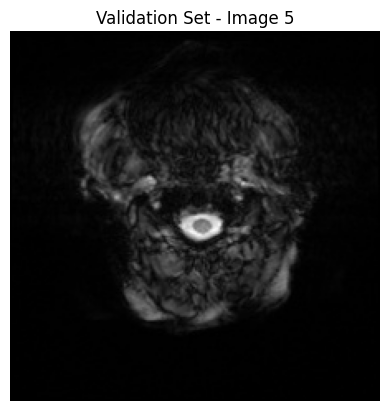

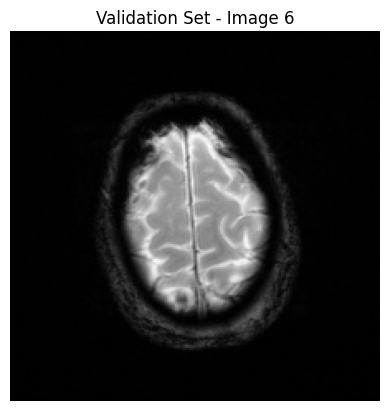

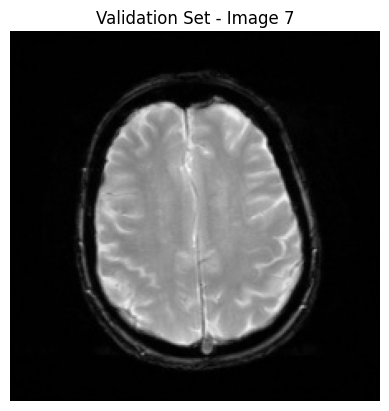

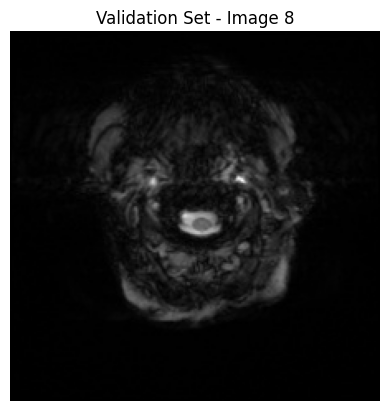

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def show_generator_images(generator, title=""):
    total_images = generator.samples
    batch_size = generator.batch_size
    batches = int(np.ceil(total_images / batch_size))

    print(f"\nShowing {total_images} images from {title}:")

    count = 0
    for i in range(batches):
        images, labels = next(generator)
        for img in images:
            count += 1
            plt.imshow(img.squeeze(), cmap='gray')
            plt.title(f"{title} - Image {count}")
            plt.axis('off')
            plt.show()

# Reset generators before looping (to ensure starting from first batch)
train_gen.reset()
val_gen.reset()

# Show training images
show_generator_images(train_gen, title="Training Set")

# Show validation images
show_generator_images(val_gen, title="Validation Set")


In [26]:
# Save the trained model
model.save("/content/mri_model.keras")
print("Model saved successfully!")

Model saved successfully!


In [29]:
#for predicting the images in the folder
import glob

test_folder = "/content/AD_T2_PNG/Unsorted"  # or any folder with new images
image_paths = glob.glob(os.path.join(test_folder, "*.png"))[:10]  # change extension as needed

for img_path in image_paths:
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    pred = model.predict(img_array)
    predicted_label = class_names[np.argmax(pred)]

    print(f"{os.path.basename(img_path)} → {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
001628.png → AD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
000912.png → AD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
001576.png → AD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
001321.png → AD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
003564.png → AD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
002465.png → AD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
000035.png → AD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
004535.png → AD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
002777.png → AD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
000391.png → AD
